In [ ]:

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/57662584/MMAI5000_group_14_project/refs/heads/main/Data-ATP-W119-PEW.csv')
print(df.head())
df.columns = [col[:-5] + '_W119' if col.lower().endswith('_w119') else col for col in df.columns]



     QKEY INTERVIEW_START_W119   INTERVIEW_END_W119  DEVICE_TYPE_W119  \
0  100314  12/13/2022 23:12:27  12/13/2022 23:23:59                 2   
1  100363  12/13/2022 19:50:59  12/13/2022 20:05:29                 2   
2  100598  12/14/2022 16:30:21  12/14/2022 16:47:21                 1   
3  100637  12/14/2022 08:22:09  12/14/2022 08:33:45                 1   
4  100803  12/15/2022 09:05:46  12/15/2022 09:22:29                 1   

   LANG_W119  FORM_W119  DESRISK_COMF_W119  DESRISK_CREAT_W119  \
0          1          1                  4                   3   
1          1          2                  3                   3   
2          1          1                  4                   4   
3          1          2                  2                   1   
4          1          2                  3                   3   

   DESRISK_NTECH_W119  RISK2_W119  ...  F_PARTYLN_FINAL  F_PARTYSUM_FINAL  \
0                   4           2  ...                                  1   
1         

C:\Users\User\AppData\Local\Temp\ipykernel_15100\2529272665.py:1: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/57662584/MMAI5000_group_14_project/refs/heads/main/Data-ATP-W119-PEW.csv')


In [35]:
# Extract the specified variables
variables_to_extract = [
    'DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119', 'RISK2_W119',
    'AI_HEARD_W119', 'CNCEXC_W119', 'USEAI_W119',
    'AIKNOW1_W119', 'AIKNOW2_W119', 'AIKNOW3_W119', 'AIKNOW5_W119', 'AIKNOW6_W119', 'AIKNOW7_W119',
    'AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 'AIKNOW3_CORRECT_W119', 
    'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 'AIKNOW7_CORRECT_W119', 'AIKNOW_INDEX_W119',
    'AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119', 'MEDBIAS_W119',
    'AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119', 'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119',
    'HCMEDBIAS_W119', 'EMPLSIT_W119', 'JOBAPPYR_W119', 'INDUSTRYCOMBO_W119',
    'AIWRK2_a_W119', 'AIWRK2_b_W119', 'AIWRK2_c_W119',
    'AIWRK3_a_W119', 'AIWRK3_b_W119', 'AIWRK3_c_W119',
    'AIWRKH1_W119', 'AIWRKH2_a_W119', 'AIWRKH2_b_W119',
    'AIWRKH3_a_W119', 'AIWRKH3_b_W119', 'AIWRKH3_c_W119', 'AIWRKH3_d_W119', 'AIWRKH4_W119',
    'AIWRKM1_W119', 'AIWRKM2_a_W119', 'AIWRKM2_b_W119', 'AIWRKM2_c_W119', 'AIWRKM2_d_W119',
    'AIWRKM2_e_W119', 'AIWRKM2_f_W119', 'AIWRKM3_a_W119', 'AIWRKM3_b_W119', 'AIWRKM3_c_W119',
    'AIWRKM3_d_W119', 'AIWRKM3_e_W119', 'AIWRKM3_f_W119', 'AIWRKM4_a_W119', 'AIWRKM4_b_W119',
    'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_EDUCCAT2', 'F_RACECMB', 'F_RACETHNMOD',
    'F_CITIZEN', 'F_BIRTHPLACE', 'F_HISP', 'F_HISP_ORIGIN', 'F_CREGION', 'F_CDIVISION',
    'F_METRO', 'F_REG', 'F_INC_SDT1', 'F_INC_TIER2', 'F_MARITAL', 'F_RELIG',
    'F_RELIGCAT1', 'F_ATTEND', 'F_PARTY_FINAL', 'F_PARTYLN_FINAL', 'F_PARTYSUM_FINAL',
    'F_PARTYSUMIDEO_FINAL', 'F_IDEO'
]

# Check which variables exist in the dataset
available_vars = [var for var in variables_to_extract if var in df.columns]
missing_vars = [var for var in variables_to_extract if var not in df.columns]

print(f"Available variables: {len(available_vars)}")
print(f"Missing variables: {len(missing_vars)}")

if missing_vars:
    print(f"\nMissing variables: {missing_vars}")

# Extract the available variables
df_selected = df[available_vars].copy()

print(f"\nDataset shape after extraction: {df_selected.shape}")
print(f"Selected variables: {list(df_selected.columns)}")

# Display basic info about the extracted dataset
print(f"\nBasic info:")
print(df_selected.info())

Available variables: 87
Missing variables: 0

Dataset shape after extraction: (11004, 87)
Selected variables: ['DESRISK_COMF_W119', 'DESRISK_CREAT_W119', 'DESRISK_NTECH_W119', 'RISK2_W119', 'AI_HEARD_W119', 'CNCEXC_W119', 'USEAI_W119', 'AIKNOW1_W119', 'AIKNOW2_W119', 'AIKNOW3_W119', 'AIKNOW5_W119', 'AIKNOW6_W119', 'AIKNOW7_W119', 'AIKNOW1_CORRECT_W119', 'AIKNOW2_CORRECT_W119', 'AIKNOW3_CORRECT_W119', 'AIKNOW5_CORRECT_W119', 'AIKNOW6_CORRECT_W119', 'AIKNOW7_CORRECT_W119', 'AIKNOW_INDEX_W119', 'AIHCCOMF_W119', 'AIHCTRT1_W119', 'AIHCTRT2_W119', 'MEDBIAS_W119', 'AIHCCHG_QUAL_W119', 'AIHCCHG_MIST_W119', 'AIHCCHG_REL_W119', 'AIHCCHG_RACETHN_W119', 'AIHCCHG_SECUR_W119', 'HCMEDBIAS_W119', 'EMPLSIT_W119', 'JOBAPPYR_W119', 'INDUSTRYCOMBO_W119', 'AIWRK2_a_W119', 'AIWRK2_b_W119', 'AIWRK2_c_W119', 'AIWRK3_a_W119', 'AIWRK3_b_W119', 'AIWRK3_c_W119', 'AIWRKH1_W119', 'AIWRKH2_a_W119', 'AIWRKH2_b_W119', 'AIWRKH3_a_W119', 'AIWRKH3_b_W119', 'AIWRKH3_c_W119', 'AIWRKH3_d_W119', 'AIWRKH4_W119', 'AIWRKM1_W119

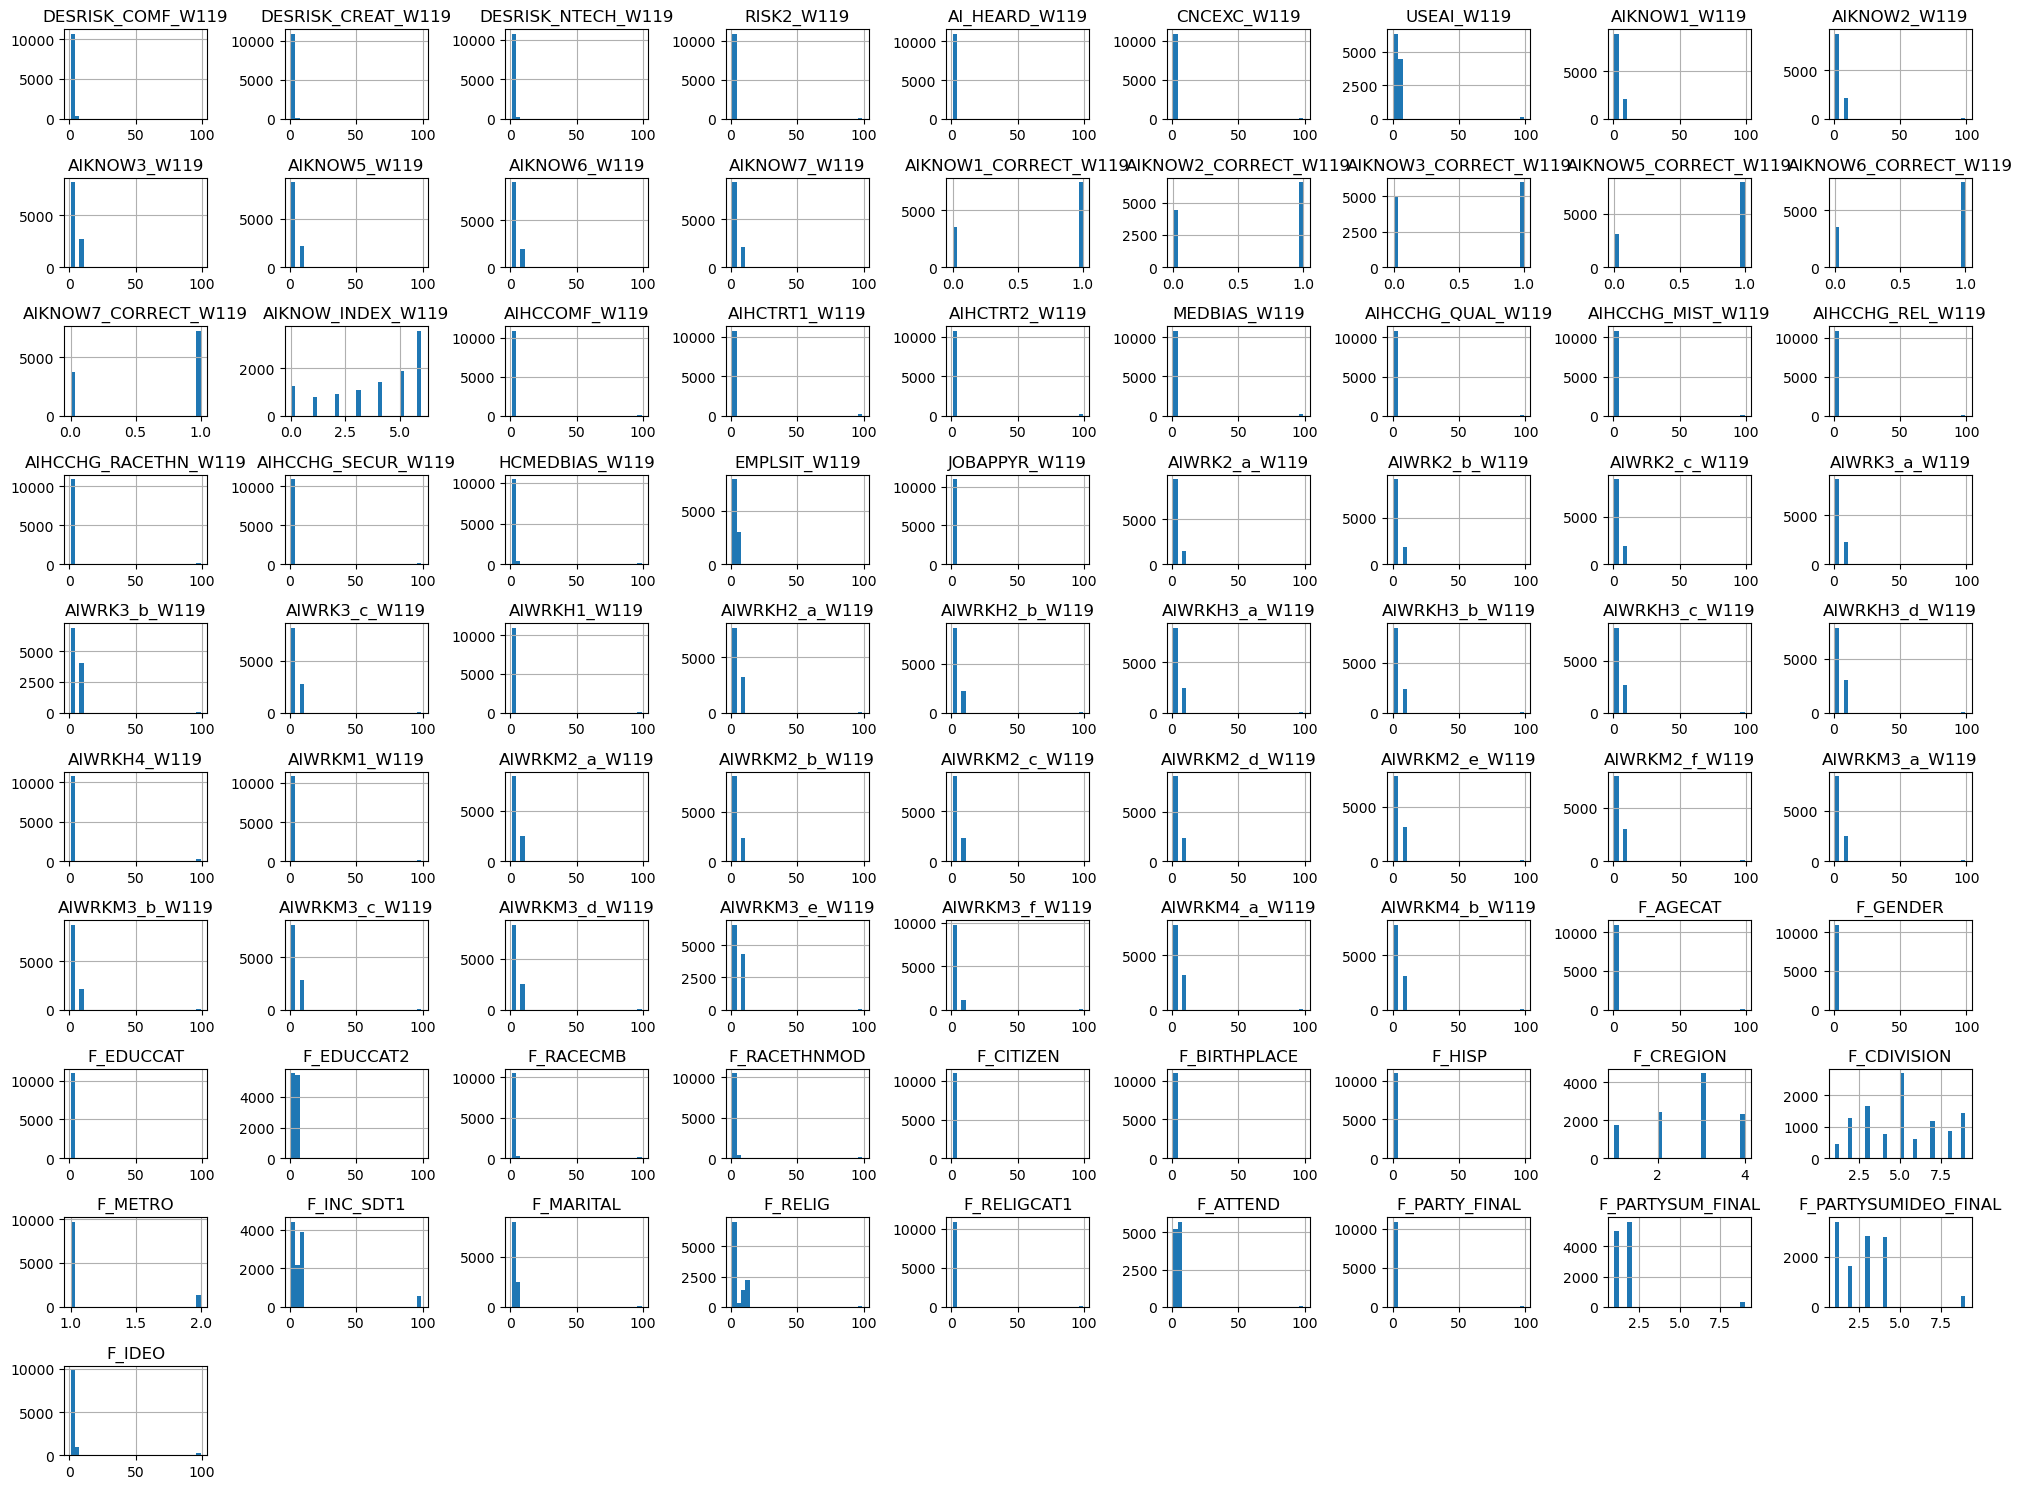


INDUSTRYCOMBO_W119 value counts:
INDUSTRYCOMBO_W119
      4507
2     1052
5      822
3      682
11     666
1      590
9      571
6      559
8      546
4      532
7      290
13     169
99      18
Name: count, dtype: int64

F_HISP_ORIGIN value counts:
F_HISP_ORIGIN
      9522
1      606
8      280
2      145
7      102
3      101
4       75
6       68
99      45
5       33
97      27
Name: count, dtype: int64

F_REG value counts:
F_REG
1     9303
3      844
2      430
       362
99      65
Name: count, dtype: int64

F_INC_TIER2 value counts:
F_INC_TIER2
2     4002
3     2113
1     1597
2     1231
1      686
3      512
99     480
       235
99     148
Name: count, dtype: int64

F_PARTYLN_FINAL value counts:
F_PARTYLN_FINAL
      6843
2     2036
1     1811
99     314
Name: count, dtype: int64


In [36]:
# 查看所有变量的分布情况
import matplotlib.pyplot as plt

# 数值型变量分布（直方图）
num_cols = df_selected.select_dtypes(include=['number']).columns
df_selected[num_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

# 分类型变量分布（前10个变量的频数统计）
cat_cols = df_selected.select_dtypes(include=['object', 'category']).columns
for col in cat_cols[:10]:
    print(f"\n{col} value counts:")
    print(df_selected[col].value_counts(dropna=False))

In [38]:
# 导出数值型变量的描述统计为CSV
num_cols = df_selected.select_dtypes(include=['number']).columns
num_stats = df_selected[num_cols].describe().transpose()
num_stats.to_csv('numerical_variable_distribution.csv', index=True)
print("Numerical variable distribution saved to 'numerical_variable_distribution.csv'.")

# 导出分类型变量的频数统计为CSV
cat_cols = df_selected.select_dtypes(include=['object', 'category']).columns
cat_stats_list = []
for col in cat_cols:
    value_counts = df_selected[col].value_counts(dropna=False)
    temp_df = value_counts.reset_index()
    temp_df.columns = ['value', 'count']
    temp_df['variable'] = col
    cat_stats_list.append(temp_df)
cat_stats_df = pd.concat(cat_stats_list, ignore_index=True)[['variable', 'value', 'count']]
cat_stats_df.to_csv('categorical_variable_distribution.csv', index=False)
print("Categorical variable distribution saved to 'categorical_variable_distribution.csv'.")

Numerical variable distribution saved to 'numerical_variable_distribution.csv'.
Categorical variable distribution saved to 'categorical_variable_distribution.csv'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   DESRISK_COMF_W119     11004 non-null  category
 1   DESRISK_CREAT_W119    11004 non-null  category
 2   DESRISK_NTECH_W119    11004 non-null  category
 3   RISK2_W119            11004 non-null  category
 4   AI_HEARD_W119         11004 non-null  category
 5   CNCEXC_W119           11004 non-null  category
 6   USEAI_W119            11004 non-null  category
 7   AIKNOW1_W119          11004 non-null  category
 8   AIKNOW2_W119          11004 non-null  category
 9   AIKNOW3_W119          11004 non-null  category
 10  AIKNOW5_W119          11004 non-null  category
 11  AIKNOW6_W119          11004 non-null  category
 12  AIKNOW7_W119          11004 non-null  category
 13  AIKNOW1_CORRECT_W119  11004 non-null  category
 14  AIKNOW2_CORRECT_W119  11004 non-null  category
 15  AI

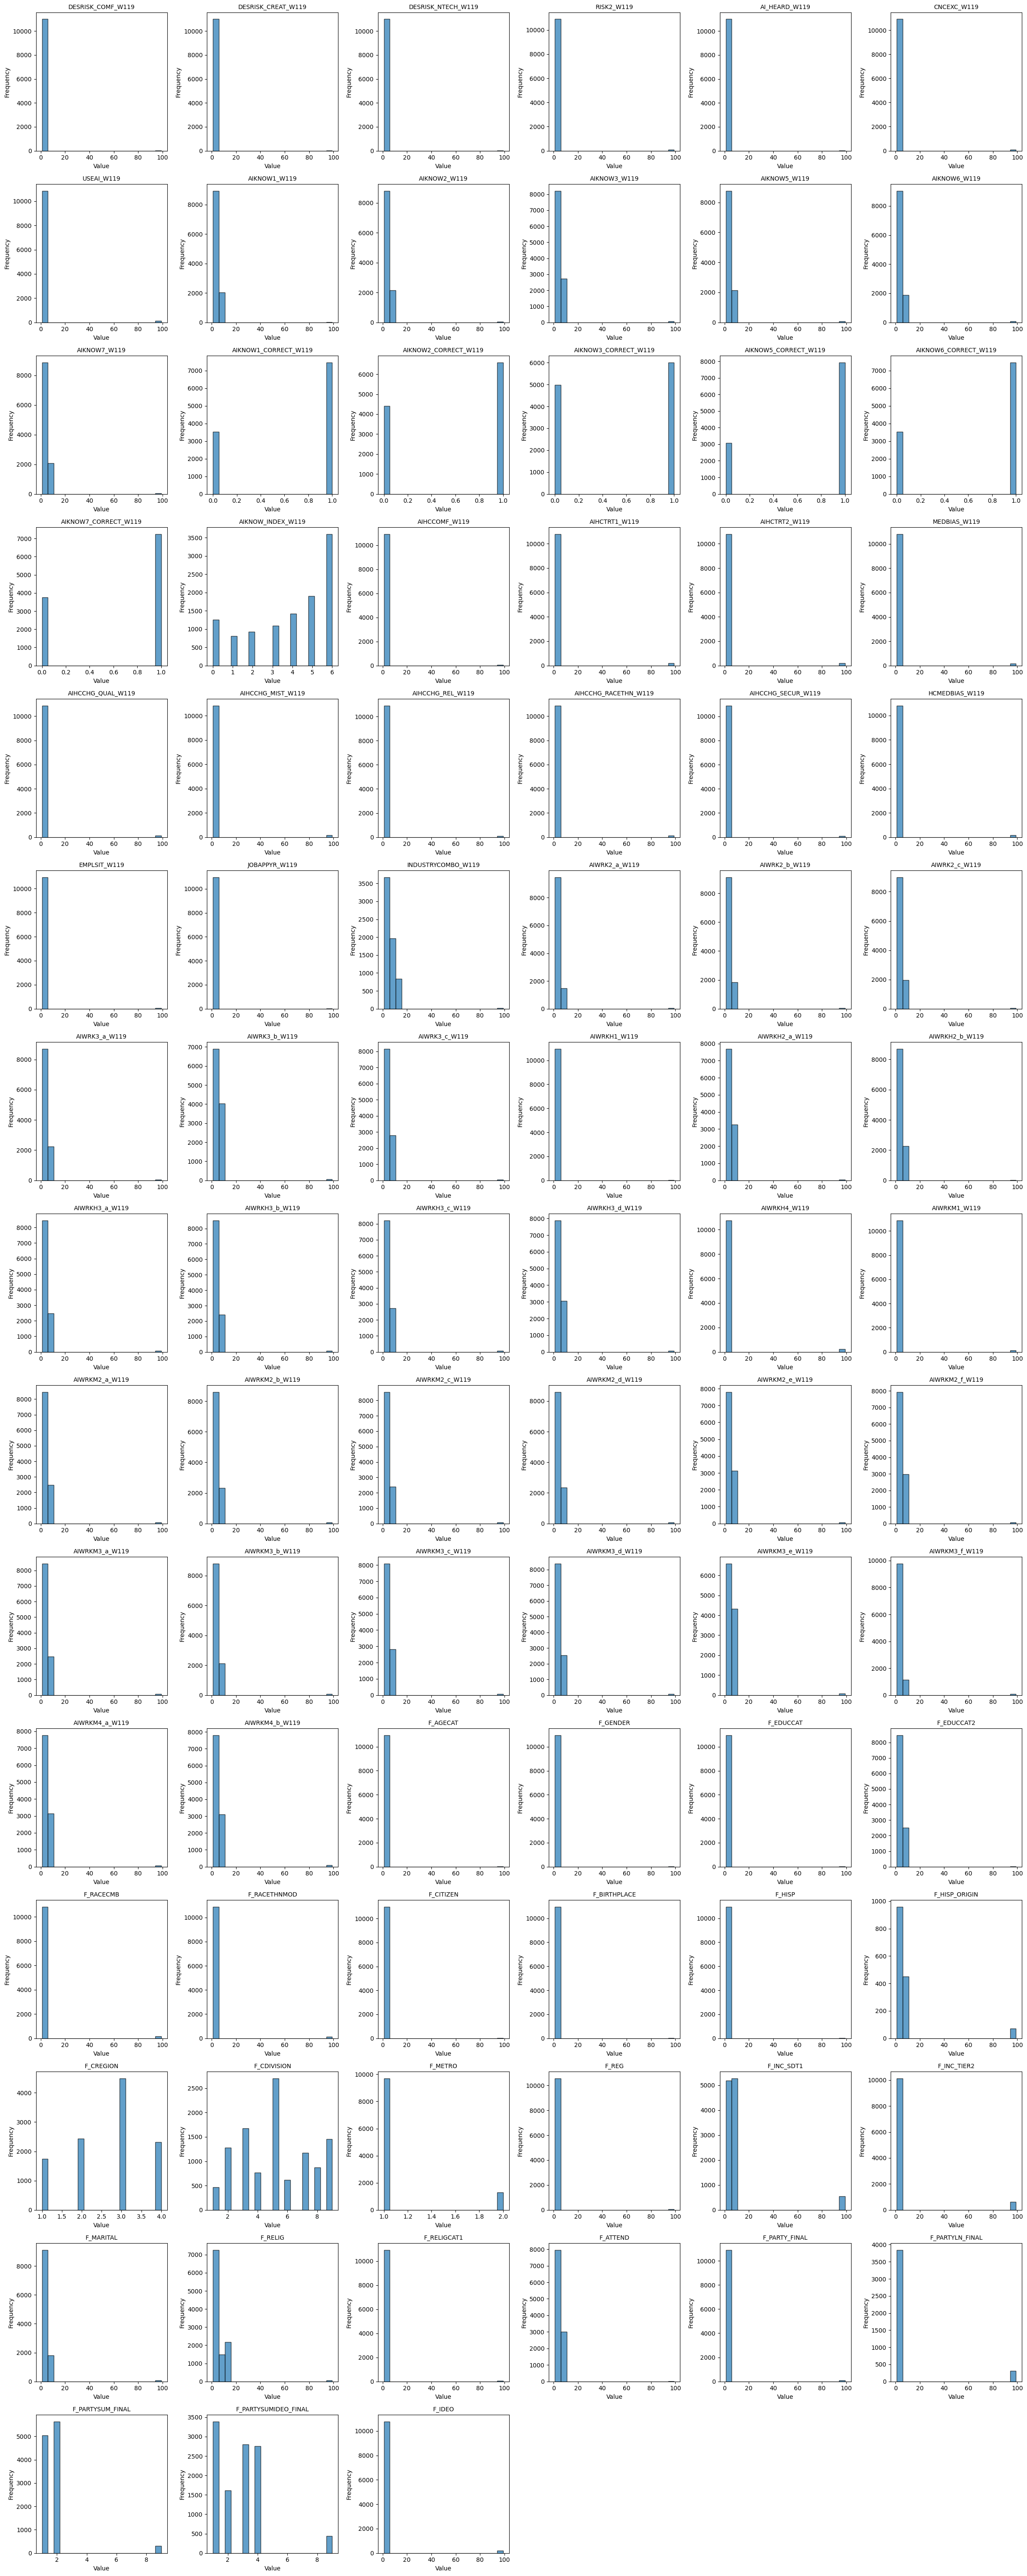

In [41]:
# 批量转换所有列为 category 类型
df_selected = df_selected.astype('category')

print(df_selected.info())
# 将所有变量的分布情况展示在同一个画布上
import matplotlib.pyplot as plt
import numpy as np

# 将 category 类型转换为数值型以便绘制直方图
df_numeric = df_selected.copy()
for col in df_numeric.columns:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# 计算子图的行列数
n_vars = len(df_numeric.columns)
n_cols = 6  # 每行6个子图
n_rows = (n_vars + n_cols - 1) // n_cols  # 向上取整

# 创建画布和子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# 绘制每个变量的直方图
for i, col in enumerate(df_numeric.columns):
    if i < len(axes):
        # 过滤掉NaN值
        data = df_numeric[col].dropna()
        if len(data) > 0:
            axes[i].hist(data, bins=20, alpha=0.7, edgecolor='black')
            axes[i].set_title(col, fontsize=10)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
        else:
            axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(col, fontsize=10)

# 隐藏多余的子图
for i in range(len(df_numeric.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Missing values after cleaning:
F_HISP_ORIGIN         9594
F_PARTYLN_FINAL       7157
INDUSTRYCOMBO_W119    4525
F_INC_TIER2            863
F_INC_SDT1             542
                      ... 
F_CITIZEN               13
DESRISK_NTECH_W119       8
AI_HEARD_W119            8
DESRISK_COMF_W119        7
DESRISK_CREAT_W119       6
Length: 75, dtype: int64

Missing value percentages:
F_HISP_ORIGIN         87.186478
F_PARTYLN_FINAL       65.039985
INDUSTRYCOMBO_W119    41.121410
F_INC_TIER2            7.842603
F_INC_SDT1             4.925482
                        ...    
F_CITIZEN              0.118139
AI_HEARD_W119          0.072701
DESRISK_NTECH_W119     0.072701
DESRISK_COMF_W119      0.063613
DESRISK_CREAT_W119     0.054526
Length: 75, dtype: float64

Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11004 entries, 0 to 11003
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  

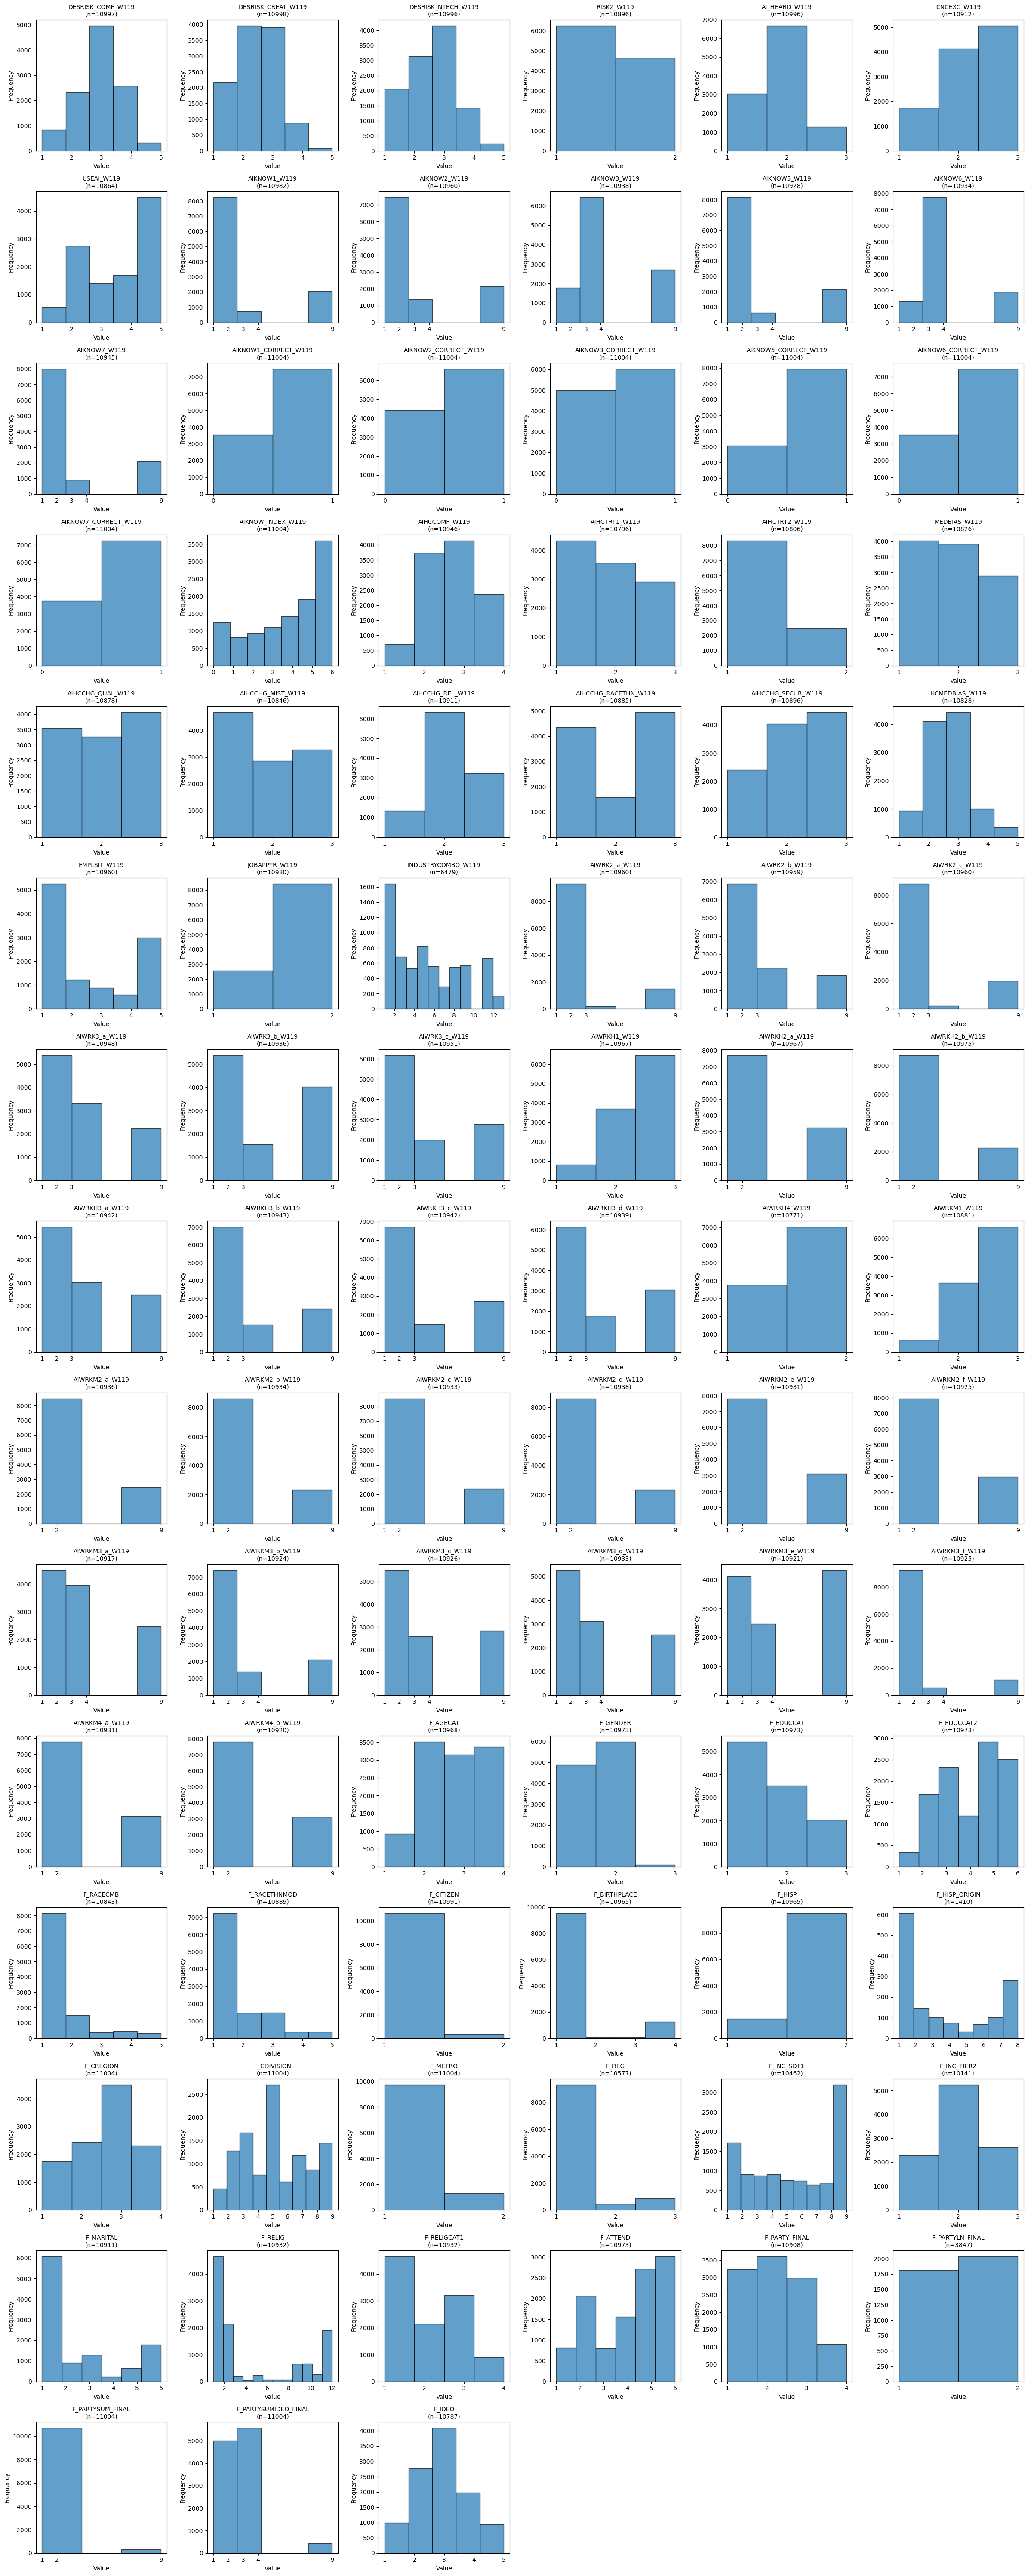

Original data shape: (11004, 87)
Cleaned data shape: (11004, 87)
Total missing values removed: 6376


In [43]:
# 处理缺失值编码
import numpy as np

# 先将所有变量转换回数值型以便处理
df_cleaned = df_selected.copy()
for col in df_cleaned.columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 定义需要替换为NaN的值
missing_codes = [97, 98, 99]

# 替换缺失值编码为NaN
for col in df_cleaned.columns:
    df_cleaned[col] = df_cleaned[col].replace(missing_codes, np.nan)

# 检查缺失值情况
print("Missing values after cleaning:")
missing_summary = df_cleaned.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print(missing_summary)

# 计算缺失值比例
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned) * 100).sort_values(ascending=False)
missing_percentage = missing_percentage[missing_percentage > 0]
print(f"\nMissing value percentages:")
print(missing_percentage)

# 显示清理后的数据信息
print(f"\nDataset info after cleaning:")
print(df_cleaned.info())

# 绘制清理后所有变量的直方图
import matplotlib.pyplot as plt
import numpy as np

# 计算子图的行列数
n_vars = len(df_cleaned.columns)
n_cols = 6  # 每行6个子图
n_rows = (n_vars + n_cols - 1) // n_cols  # 向上取整

# 创建画布和子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

# 绘制每个变量的直方图
for i, col in enumerate(df_cleaned.columns):
    if i < len(axes):
        # 过滤掉NaN值
        data = df_cleaned[col].dropna()
        if len(data) > 0:
            # 设置合适的bins数量
            unique_vals = len(data.unique())
            bins = min(20, unique_vals) if unique_vals > 1 else 1
            
            axes[i].hist(data, bins=bins, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'{col}\n(n={len(data)})', fontsize=10)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
            
            # 如果值较少，显示具体数值
            if unique_vals <= 10:
                axes[i].set_xticks(sorted(data.unique()))
        else:
            axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(col, fontsize=10)

# 隐藏多余的子图
for i in range(len(df_cleaned.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# 打印清理前后的数据形状对比
print(f"Original data shape: {df_selected.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")
print(f"Total missing values removed: {(df_selected == 99).sum().sum() + (df_selected == 98).sum().sum() + (df_selected == 97).sum().sum()}")